In [10]:
# Load libaries
import pandas as pd

# Define timeindex
timeindex = pd.date_range(start='2019-01-01 00:00',
                          end='2019-12-31 23:00',
                          freq='h')

timeindex

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00',
               ...
               '2019-12-31 14:00:00', '2019-12-31 15:00:00',
               '2019-12-31 16:00:00', '2019-12-31 17:00:00',
               '2019-12-31 18:00:00', '2019-12-31 19:00:00',
               '2019-12-31 20:00:00', '2019-12-31 21:00:00',
               '2019-12-31 22:00:00', '2019-12-31 23:00:00'],
              dtype='datetime64[ns]', length=8760, freq='h')

ModuleNotFoundError: No module named 'pvlib'

In [7]:
!pip install pvlib

  Using cached pvlib-0.12.0-py3-none-any.whl.metadata (2.9 kB)
Using cached pvlib-0.12.0-py3-none-any.whl (19.3 MB)


In [11]:
# Load libaries
import pvlib

# Call pvlib solar position method
sun_position = pvlib.solarposition.get_solarposition(time=timeindex,
                                                     latitude=54.096,
                                                     longitude=13.383,
                                                     altitude=19,
                                                     method='nrel_numpy')
sun_position
sun_position.loc['2019-01-01']
type(sun_position)

pandas.core.frame.DataFrame

<Axes: >

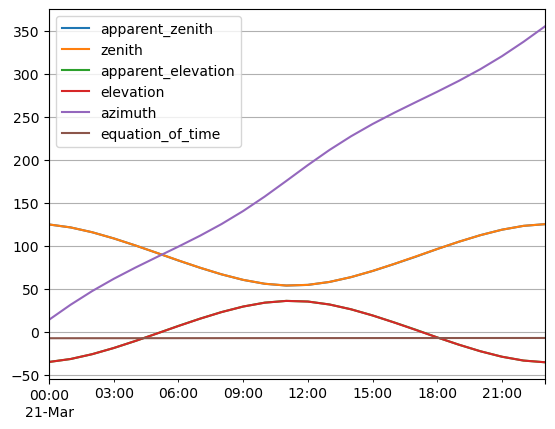

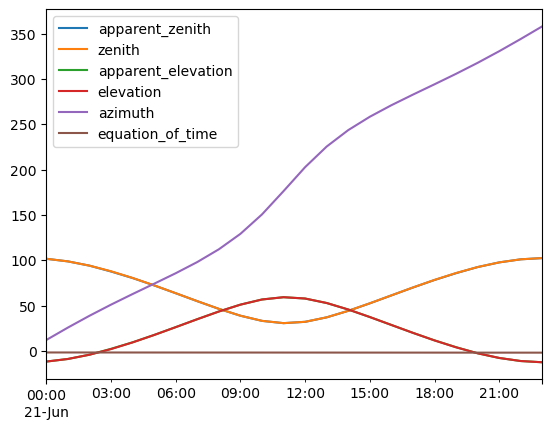

In [12]:
# Exstract specific date of the sun position DataFrame
sun_position_spring = sun_position.loc['2019-03-21']
sun_position_summer = sun_position.loc['2019-06-21']

sun_position_spring.plot(grid=True)
sun_position_summer.plot()

In [13]:
# Load libaries
import pandas as pd

# Load irradiaion data
irradiation = pd.read_csv('irradiation_greifswald.csv', comment='#', header=0, decimal='.', sep=';')
# Add dti as index to df
irradiation['dti'] = timeindex
irradiation.set_index('dti', drop=True, inplace=True)

# Load weather data
weather = pd.read_csv('weather_greifswald.csv', comment='#', header=0, decimal='.', sep=';')
# Add dti as index to df
weather['dti'] = timeindex
weather.set_index('dti', drop=True, inplace=True)


irradiation
weather

,Date,UT time,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Rainfall,Snowfall,Snow depth,Short-wave irradiation
dti,,,,,,,,,,,
2019-01-01 00:00:00,01.01.2019,01:00,279.59,89.89,1018.25,10.45,257.70,0.064372,0.000000,0.0,0.0
2019-01-01 01:00:00,01.01.2019,02:00,279.39,90.32,1017.01,10.77,256.06,0.040643,0.000000,0.0,0.0
2019-01-01 02:00:00,01.01.2019,03:00,279.39,90.51,1015.29,11.19,252.36,0.047076,0.000000,0.0,0.0
2019-01-01 03:00:00,01.01.2019,04:00,279.52,90.47,1013.43,11.99,249.64,0.099163,0.000000,0.0,0.0
2019-01-01 04:00:00,01.01.2019,05:00,279.66,90.16,1011.73,12.83,251.05,0.173830,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,31.12.2019,20:00,275.64,99.54,1028.77,5.79,294.42,0.001482,0.000000,0.0,0.0
2019-12-31 20:00:00,31.12.2019,21:00,275.47,100.08,1029.23,5.66,290.76,0.003720,0.000000,0.0,0.0
2019-12-31 21:00:00,31.12.2019,22:00,275.53,99.34,1029.51,5.67,288.40,0.004051,0.000000,0.0,0.0


In [14]:
# Load libaries
import pvlib

# Call pvlib irradiance method with assumed albedo of 0.25 and the simple isotropic diffuse model approach
irradiance_poa = pvlib.irradiance.get_total_irradiance(surface_tilt=35,
                                                       surface_azimuth=180,
                                                       solar_zenith=sun_position['zenith'],
                                                       solar_azimuth=sun_position['azimuth'],
                                                       dni=irradiation['BNI'],
                                                       ghi=irradiation['GHI'],
                                                       dhi=irradiation['DHI'],
                                                       albedo=0.25,
                                                       model='isotropic')

# As we have hourly resolution irradiance=irradiation
irradiation_poa = irradiance_poa
irradiation_poa.loc['2019-06-01']

,poa_global,poa_direct,poa_diffuse,poa_sky_diffuse,poa_ground_diffuse
dti,,,,,
2019-06-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
2019-06-01 01:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
2019-06-01 02:00:00,0.145420,0.000000,0.145420,0.141894,0.003527
2019-06-01 03:00:00,28.786433,0.000000,28.786433,28.088344,0.698089
2019-06-01 04:00:00,62.289987,0.000000,62.289987,60.779416,1.510571
2019-06-01 05:00:00,84.944061,0.000000,84.944061,82.884114,2.059946
2019-06-01 06:00:00,92.751551,0.000000,92.751551,90.502268,2.249283
2019-06-01 07:00:00,199.861218,0.853296,199.007922,194.158462,4.849461
2019-06-01 08:00:00,592.090094,408.764892,183.325201,169.772092,13.553110


In [15]:
print(sun_position.columns)

Index(['apparent_zenith', 'zenith', 'apparent_elevation', 'elevation',
       'azimuth', 'equation_of_time'],
      dtype='object')


<Axes: xlabel='dti'>

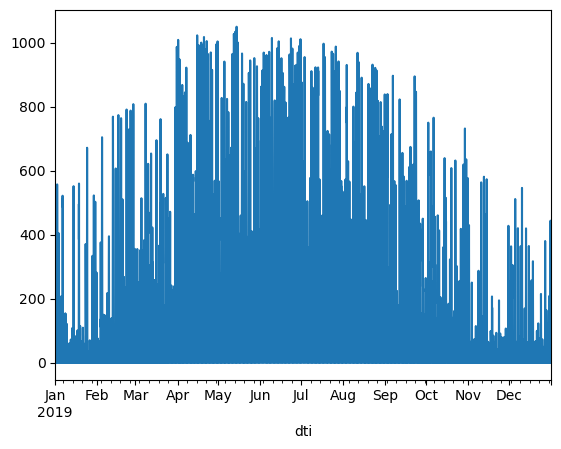

In [16]:
# Easily plot the irradiation_poa dataset
irradiation_poa['poa_global'].plot()

In [17]:
# Calculate PV cell temperature
mod_temperature = pvlib.temperature.sapm_cell(poa_global=irradiation_poa['poa_global'], 
                                              temp_air=weather['Temperature'], 
                                              wind_speed=weather['Wind speed'], 
                                              a=-3.56,
                                              b=-0.075,
                                              deltaT=3)
mod_temperature

dti
2019-01-01 00:00:00    279.59
2019-01-01 01:00:00    279.39
2019-01-01 02:00:00    279.39
2019-01-01 03:00:00    279.52
2019-01-01 04:00:00    279.66
                        ...  
2019-12-31 19:00:00    275.64
2019-12-31 20:00:00    275.47
2019-12-31 21:00:00    275.53
2019-12-31 22:00:00    275.56
2019-12-31 23:00:00    275.61
Length: 8760, dtype: float64

<Axes: xlabel='dti'>

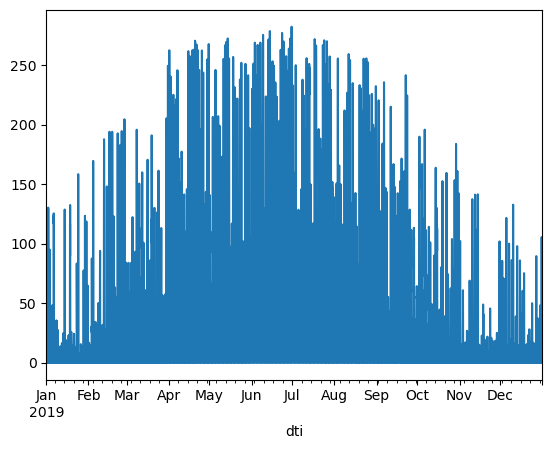

In [18]:
# Load libaries
import pvlib

# Alternative way of calculating MPP power
power_module = pvlib.pvsystem.pvwatts_dc(g_poa_effective=irradiance_poa['poa_global'].values,
                                         temp_cell=(mod_temperature-273.15),
                                         pdc0=250,
                                         gamma_pdc=0.0045)

power_module
power_module.plot()

dti
2019-12-31    312978.917139
Freq: YE-DEC, dtype: float64

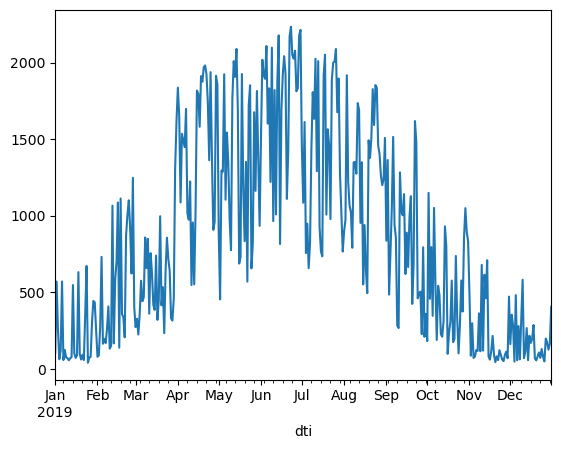

In [19]:
# Add to pandas series datetimeindex

# Resample the hourly timesereis to monthly and annual timeseries
energy_module_d = power_module.resample('D').sum()
energy_module_m = power_module.resample('ME').sum()
energy_module_y = power_module.resample('YE').sum()

energy_module_d.plot()
energy_module_y